##  `Introduction`
 In today's highly competitive business environment, companies are constantly looking for ways to gain an edge over their rivals. One of the most effective strategies that companies can use to increase their competitiveness is customer segmentation.

 Customer segmentation is the process of dividing a company's customer base into smaller groups based on specific characteristics. By doing so, companies can tailor their marketing messages and product offerings to the unique needs and preferences of each segment. This can result in increased customer satisfaction, higher sales, and improved customer retention rates.

 In this project we will perform customer segmentation and analysis using the Dataset from Kaggle.

 About the dataset: The dataset used in this project contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. Many customers are wholesalers.

# `Understanding of the Business problem`
## A company that offers some of the products, and we want to know how effectively the things sell and cluster its clients.


 1 . `InvoiceNo`   : Invoice Number.<br> 
 2 . `StockCode`   : Unique Code for each transaction.<br>
 3 . `Description` : Description of individual item. <br>
 4 . `Quantity`    : Number of Items brought.<br>
 5 . `InvoiceDate` : Date of purchase.<br>
 6 . `UnitPrice`   : Price of individual unit. <br>
 7 . `CustomerID`  : Unique ID for each customer.<br>
 8 . `Country`     : Country name. Nominal, the name of the country where each customer resides.<br>


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

## Data Exploration

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#Checking uniques values in columns
for i in df.columns:
    unique_count = df[i].nunique()
    print(f"Unique elements in '{i}': {unique_count}")

Unique elements in 'InvoiceNo': 25900
Unique elements in 'StockCode': 4070
Unique elements in 'Description': 4223
Unique elements in 'Quantity': 722
Unique elements in 'InvoiceDate': 23260
Unique elements in 'UnitPrice': 1630
Unique elements in 'CustomerID': 4372
Unique elements in 'Country': 38


## Data Cleaning

####  fix numerical data 

In [7]:
for i in df['Quantity'].unique():
    print(i)

6
8
2
32
3
4
24
12
48
18
20
36
80
64
10
120
96
23
5
1
-1
50
40
100
192
432
144
288
-12
-24
16
9
128
25
30
28
7
56
72
200
600
480
-6
14
-2
11
33
13
-4
-5
-7
-3
70
252
60
216
384
-10
27
15
22
19
17
21
34
47
108
52
-9360
-38
75
270
42
240
90
320
1824
204
69
-36
-192
-144
160
2880
1400
39
-48
-50
26
1440
31
82
78
97
98
35
57
-20
110
-22
-30
-70
-130
-80
-120
-40
-25
-14
-15
-69
-140
-320
-8
720
156
324
38
37
49
95
-9
-11
29
41
-72
-35
-21
-43
-19
-18
-44
402
378
150
300
54
104
67
258
66
44
55
46
99
61
408
972
208
1008
1000
-77
1488
250
1394
400
-223
-150
-13
-33
-723
-177
79
84
-32
-100
-28
272
-145
-47
-96
113
45
106
68
267
115
65
1728
-60
-16
53
-240
76
460
71
43
213
58
576
2400
500
180
-300
-500
-23
752
960
1296
210
172
215
129
138
116
135
197
-106
-54
-17
-939
147
168
256
-201
-53
-29
-2600
-990
-290
-45
860
1010
1356
1284
186
114
360
1930
2000
3114
1300
670
111
211
59
-310
-61
-41
176
648
62
74215
-74215
-64
-84
89
-1400
73
-57
112
456
-59
-31
5568
2560
136
900
-600
-42
-94
-207
-52
1

#### Inference : there are numbers starts with (-) so we will delete it

In [8]:
df['Quantity'] = df['Quantity'].astype(str)

In [9]:
def fix_quantity(x):
        
        if x[0]== "-":
            return float(x[1:])
        else:
            
            return float(x)

In [10]:
print(fix_quantity("-3"))
print("------------")
print(fix_quantity("3"))

3.0
------------
3.0


In [11]:
df["Quantity"] = df["Quantity"].apply(fix_quantity)

#### ok ,let's check it again

In [12]:
for i in df['Quantity'].unique():
    print(i)

6.0
8.0
2.0
32.0
3.0
4.0
24.0
12.0
48.0
18.0
20.0
36.0
80.0
64.0
10.0
120.0
96.0
23.0
5.0
1.0
50.0
40.0
100.0
192.0
432.0
144.0
288.0
16.0
9.0
128.0
25.0
30.0
28.0
7.0
56.0
72.0
200.0
600.0
480.0
14.0
11.0
33.0
13.0
70.0
252.0
60.0
216.0
384.0
27.0
15.0
22.0
19.0
17.0
21.0
34.0
47.0
108.0
52.0
9360.0
38.0
75.0
270.0
42.0
240.0
90.0
320.0
1824.0
204.0
69.0
160.0
2880.0
1400.0
39.0
26.0
1440.0
31.0
82.0
78.0
97.0
98.0
35.0
57.0
110.0
130.0
140.0
720.0
156.0
324.0
37.0
49.0
95.0
29.0
41.0
43.0
44.0
402.0
378.0
150.0
300.0
54.0
104.0
67.0
258.0
66.0
55.0
46.0
99.0
61.0
408.0
972.0
208.0
1008.0
1000.0
77.0
1488.0
250.0
1394.0
400.0
223.0
723.0
177.0
79.0
84.0
272.0
145.0
113.0
45.0
106.0
68.0
267.0
115.0
65.0
1728.0
53.0
76.0
460.0
71.0
213.0
58.0
576.0
2400.0
500.0
180.0
752.0
960.0
1296.0
210.0
172.0
215.0
129.0
138.0
116.0
135.0
197.0
939.0
147.0
168.0
256.0
201.0
2600.0
990.0
290.0
860.0
1010.0
1356.0
1284.0
186.0
114.0
360.0
1930.0
2000.0
3114.0
1300.0
670.0
111.0
211.0
59.0
310.0
176.

In [13]:
for i in df['UnitPrice'].unique():
    print(i)

2.55
3.39
2.75
7.65
4.25
1.85
1.69
2.1
3.75
1.65
4.95
9.95
5.95
7.95
0.85
0.65
1.25
2.95
1.95
0.42
18.0
1.06
6.95
10.95
3.45
0.55
0.38
1.45
3.95
6.75
27.5
14.95
16.95
4.65
6.45
12.75
19.95
8.5
3.82
3.37
5.45
6.35
0.72
0.64
0.1
0.32
1.48
0.29
165.0
35.75
3.35
10.65
15.0
0.95
0.21
0.12
0.0
0.24
3.25
1.49
2.25
1.55
18.95
8.95
50.0
2.51
1.66
0.43
7.62
4.21
2.98
5.91
3.36
16.98
1.28
11.02
8.47
0.81
5.06
12.72
10.17
6.77
20.38
11.87
25.49
51.02
9.32
34.0
0.84
16.13
21.23
18.68
14.43
3.81
4.24
1.26
5.09
2.96
2.11
569.77
13.57
29.95
4.6
1.05
5.49
59.53
15.28
19.53
2.82
1.27
3.19
0.99
2.13
5.51
8.49
8.07
7.22
2.54
9.34
5.94
607.49
0.19
10.75
24.95
79.95
11.95
0.03
0.75
0.36
0.34
0.16
1.88
7.25
0.18
295.0
40.0
5.74
29.79
254.43
121.06
498.47
1.84
6.37
887.52
3.83
28.0
7.5
42.95
21.95
26.95
29.29
0.14
5.55
49.95
1.0
3.49
76.55
10.62
7.64
863.74
39.96
11.05
940.87
15.95
35.0
4.41
0.3
9.77
0.83
950.99
6.6
1.93
3.21
0.53
924.59
95.38
12.95
52.0
281.0
631.31
313.78
0.07
13541.33
1.7
836.14
229.74
448

####  Inference :  the column is clean and float

### check for null values

In [14]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

####  Lets drop all these null values 

In [15]:
df=df.dropna()
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Univariate analysis

In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,13.412279,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.624170,NaN,69.315162,1713.600303


## it is clear that ..
#### 1. there are outliers in both Quantity & UnitPrice
#### 2.there are zero values in [ UnitPrice ] which doesn't make sense

<Axes: ylabel='Quantity'>

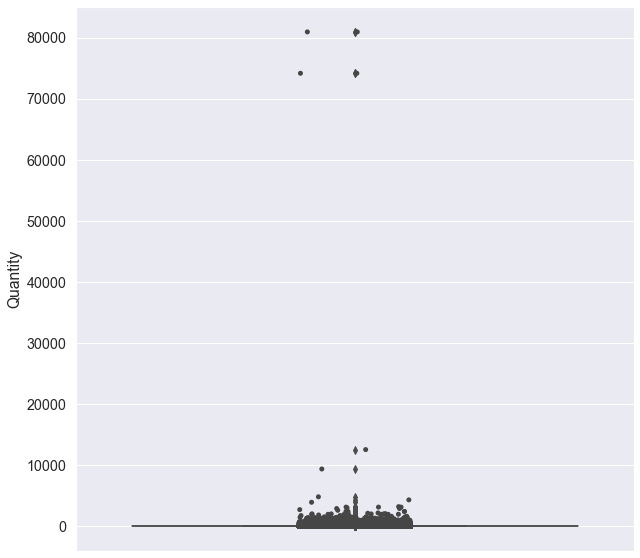

In [17]:
#detect and handle outliers
sns.boxplot( y='Quantity',data=df)
sns.stripplot(y='Quantity',data=df, color="#474646")

<Axes: ylabel='Quantity'>

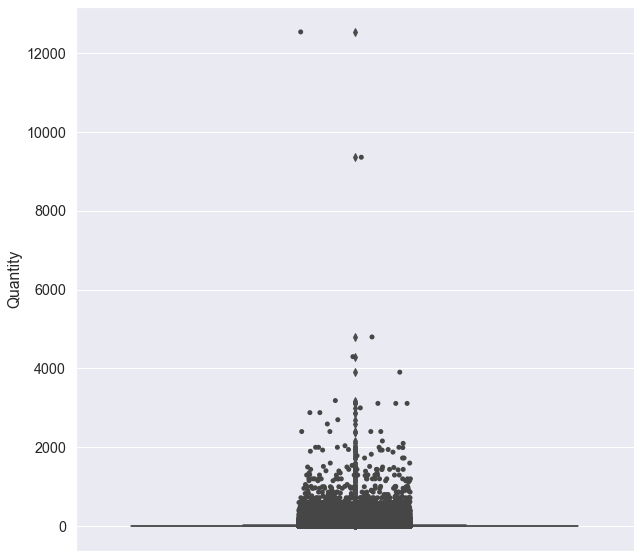

In [18]:
#lets drop the outliers
outliers_indices = df.loc[df['Quantity']>20000].index
df = df.drop(outliers_indices)
sns.boxplot( y='Quantity',data=df)
sns.stripplot(y='Quantity',data=df, color="#474646")

<Axes: ylabel='UnitPrice'>

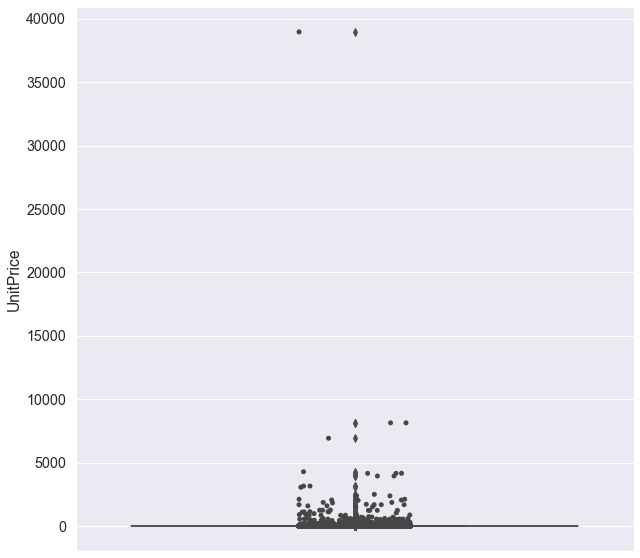

In [19]:
sns.boxplot( y='UnitPrice',data=df)
sns.stripplot(y='UnitPrice',data=df, color="#474646")

<Axes: ylabel='UnitPrice'>

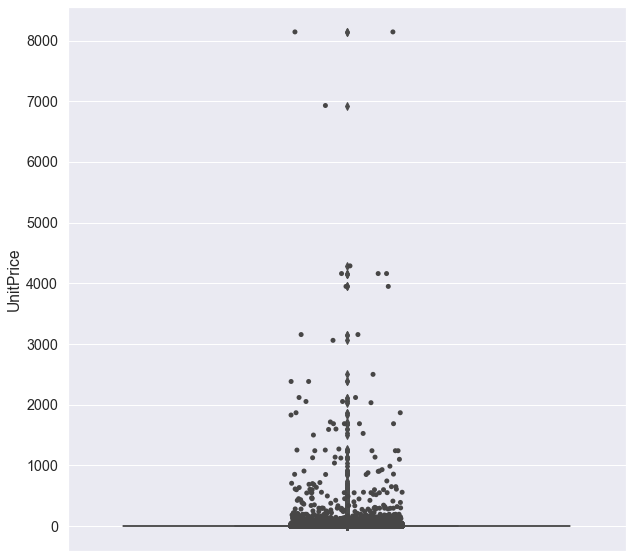

In [20]:
outliers_indices = df.loc[df['UnitPrice']>10000].index
df= df.drop(outliers_indices)
sns.boxplot( y='UnitPrice',data=df)
sns.stripplot(y='UnitPrice',data=df, color="#474646")

In [21]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406824.000000,406824,406824.000000,406824.000000
mean,12.649409,2011-07-10 16:31:13.418677248,3.364707,15287.699804
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,12540.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,50.063287,NaN,32.746411,1713.596470


Great, all anomalies have been fixed , so let's fix zero values in UnitPrice column

In [22]:
zero_values = df[df['UnitPrice']==0].index
zero_values

Index([  9302,  33576,  40089,  47068,  47070,  56674,  86789, 130188, 139453,
       145208, 157042, 187613, 198383, 279324, 282912, 285657, 298054, 314745,
       314746, 314747, 314748, 358655, 361825, 379913, 395529, 420404, 436428,
       436597, 436961, 439361, 446125, 446793, 446794, 454463, 454464, 479079,
       479546, 480649, 485985, 502122],
      dtype='int64')

In [23]:
df.drop(zero_values, inplace=True)


In [24]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406784.000000,406784,406784.000000,406784.000000
mean,12.616521,2011-07-10 16:29:00.384823296,3.365038,15287.805066
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13954.000000
50%,5.000000,2011-07-31 11:46:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,9360.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,46.047305,NaN,32.748004,1713.569229


ok done 

## data preprocessing

let's create profit , year and month columns to use it in our analysis 

In [25]:
#create profit column
def calculate_profit(x):
    Quantity = x['Quantity']
    UnitPrice = x['UnitPrice']
    profit = Quantity * UnitPrice
    return profit

In [26]:
df['profit']=df[['Quantity','UnitPrice']].apply(calculate_profit,axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [27]:
#create year and month columns 
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.month
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,profit,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12


In [28]:
# let's make the column of Description easy to read 
df['Description'] = df['Description'].apply(lambda a:a.lower())
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,profit,year,month
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12
541905,581587,22899,children's apron dolly girl,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12
541906,581587,23254,childrens cutlery dolly girl,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
541907,581587,23255,childrens cutlery circus parade,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12


we are now ready to do the data analysis 

## Exploratory Data Analysis (EDA) & VISUALIZATION

In [30]:
# what is the most sold product and the density of the profit
df[  df["profit"]==df["profit"].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,profit,year,month
222680,556444,22502,picnic basket wicker 60 pieces,60.0,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,38970.0,2011,6


Inference : the most sold product was "picnic basket wicker 60 pieces" 

In [31]:
# what a less product has been sold
df[  df["profit"]==df["profit"].min() ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,profit,year,month
157195,550193,PADS,pads to match all cushions,1.0,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001,2011,4
279045,561226,PADS,pads to match all cushions,1.0,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001,2011,7
359871,568200,PADS,pads to match all cushions,1.0,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001,2011,9
361741,568375,BANK CHARGES,bank charges,1.0,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0.001,2011,9


In [32]:
# which Country is more profitable 
df["Country"].value_counts()

Country
United Kingdom          361849
Germany                   9493
France                    8490
EIRE                      7483
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               1876
Portugal                  1480
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon                     45


<Axes: xlabel='count', ylabel='Country'>

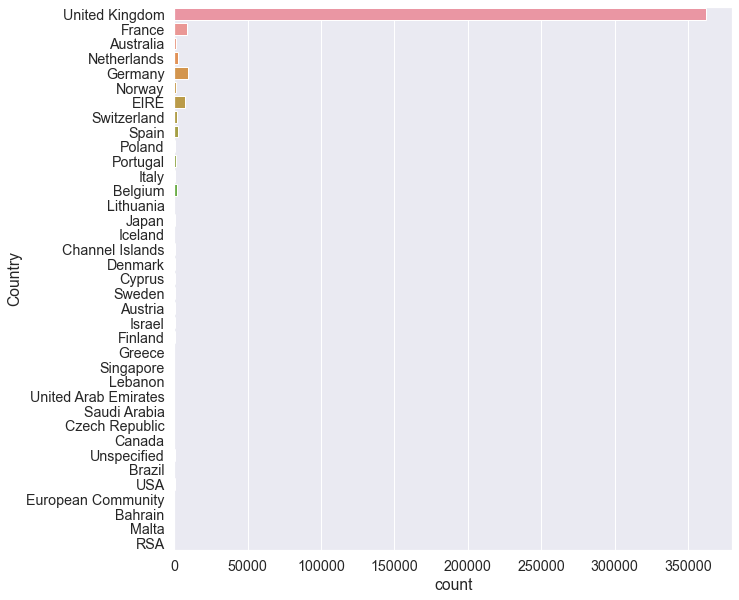

In [33]:
sns.countplot(y='Country',data=df)

It is clear that United Kingdom is the most profitable country and this makes sense because most of the branches are located in United Kingdom

<Axes: xlabel='profit', ylabel='Country'>

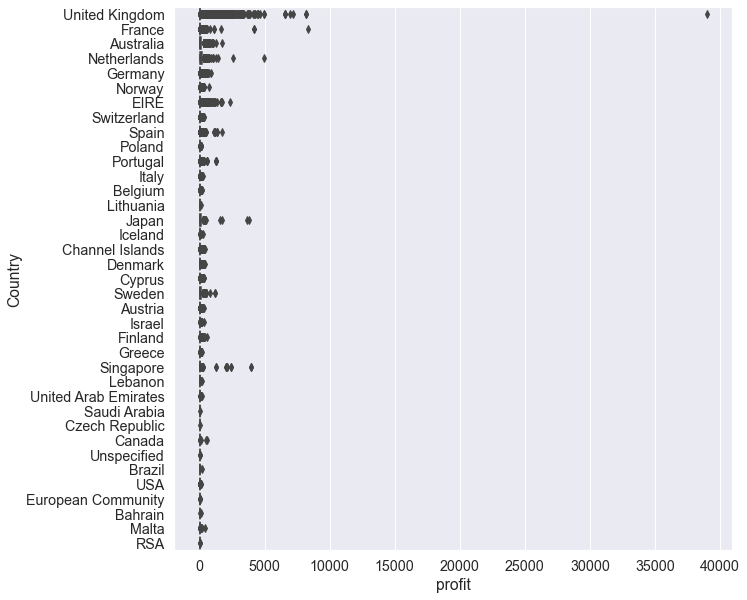

In [35]:
sns.boxplot(y='Country',x='profit',data=df)

<Axes: xlabel='year', ylabel='profit'>

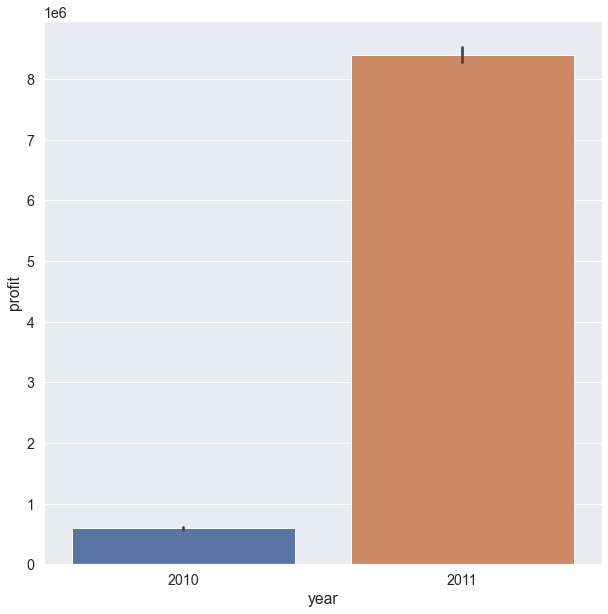

In [38]:
sns.barplot(x='year',y='profit',estimator=np.sum,data=df)

this makes sense as most of this data is form 2011 

In [39]:
# how much did we earn in each month in each year
t_profit = pd.pivot_table(index='year',columns='month',values='profit',data=df,aggfunc=np.sum)
t_profit

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590823.76
2011,509448.5,457728.55,611036.91,512352.871,708938.04,675444.22,625943.541,674319.8,974236.392,1104033.99,1191227.02,356940.00


In [40]:
#Highest number of orders and money spent on purchases
most_orders=df.groupby(["CustomerID","Country"])[["InvoiceNo"]].count().reset_index()
most_orders.sort_values('InvoiceNo',ascending=False).rename(columns={"InvoiceNo":"NumberOf_Orders"}).head()

,CustomerID,Country,NumberOf_Orders
4048,17841.0,United Kingdom,7983
1901,14911.0,EIRE,5901
1306,14096.0,United Kingdom,5128
337,12748.0,United Kingdom,4641
1680,14606.0,United Kingdom,2782


In [41]:
most_money_spent=df.groupby(["CustomerID","Country"])[["profit"]].sum().reset_index()
most_money_spent.sort_values("profit",ascending=False).rename(columns={"profit":"Amount_spent"}).head()

,CustomerID,Country,Amount_spent
1709,14646.0,Netherlands,280923.02
4239,18102.0,United Kingdom,262876.11
3764,17450.0,United Kingdom,201619.41
1901,14911.0,EIRE,155077.50
56,12415.0,Australia,126103.61


In [42]:
# Top 5 countries with most number of orders
country_order=df.groupby("Country")["InvoiceNo"].nunique().reset_index()
country_order=country_order.sort_values("InvoiceNo").rename(columns={"InvoiceNo":"NumberOf_Orders"})
country_order

,Country,NumberOf_Orders
20,Lebanon,1
4,Brazil,1
27,RSA,1
2,Bahrain,2
28,Saudi Arabia,2
34,United Arab Emirates,3
21,Lithuania,4
8,Czech Republic,5
11,European Community,5
17,Israel,6


Text(0.5, 1.0, 'Number of orders for each country')

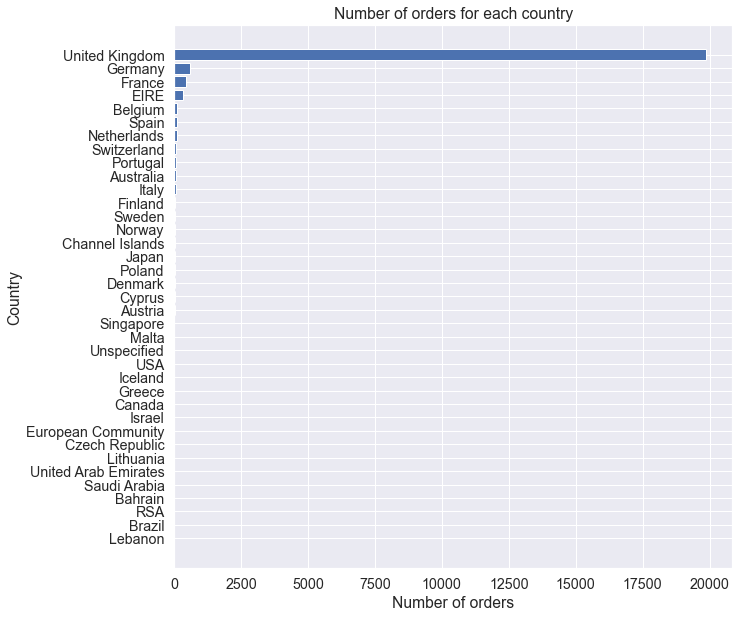

In [43]:
plt.barh(country_order["Country"],country_order["NumberOf_Orders"])
plt.xlabel("Number of orders")
plt.ylabel("Country")
plt.title("Number of orders for each country")

Text(0.5, 1.0, 'Number of orders for each country')

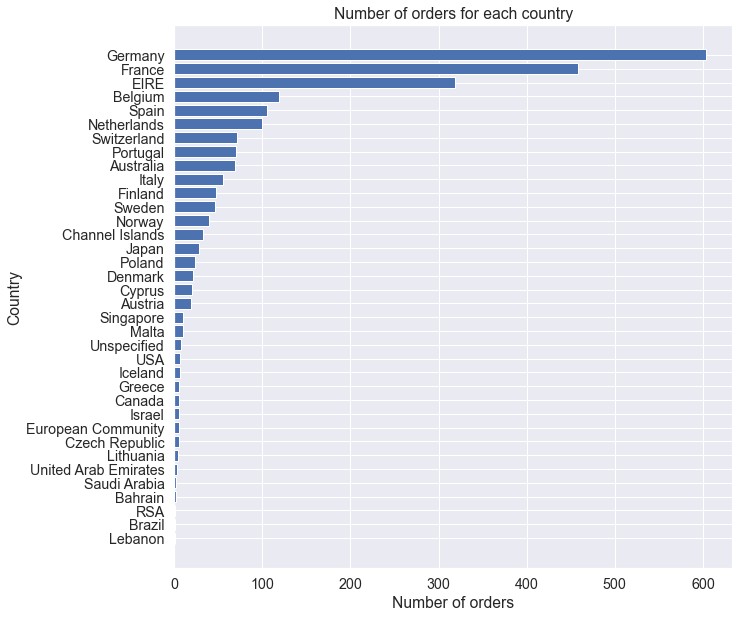

In [44]:
#without (UK) Top countries with most number of orders
country_without_UK=country_order[country_order["Country"]!="United Kingdom"]
plt.barh(country_without_UK["Country"],country_without_UK["NumberOf_Orders"])
plt.xlabel("Number of orders")
plt.ylabel("Country")
plt.title("Number of orders for each country")

In [45]:
# Top 5 countries with highest money spent
country_spending=df.groupby("Country")["profit"].sum().reset_index()
country_spending=country_spending.sort_values("profit").rename(columns={"profit":"Money_spent"})
country_spending

,Country,Money_spent
28,Saudi Arabia,160.670
2,Bahrain,548.400
8,Czech Republic,945.760
27,RSA,1002.310
4,Brazil,1143.600
11,European Community,1308.750
21,Lithuania,1661.060
20,Lebanon,1693.880
34,United Arab Emirates,1902.280
36,Unspecified,2667.070


([<matplotlib.axis.XTick at 0x2a9985f08b0>,
 [Text(0, 0, '0'),
  Text(1000000, 0, '1M'),
  Text(2000000, 0, '2M'),
  Text(3000000, 0, '3M'),
  Text(4000000, 0, '4M'),
  Text(5000000, 0, '5M'),
  Text(6000000, 0, '6M'),
  Text(7000000, 0, '7M')])

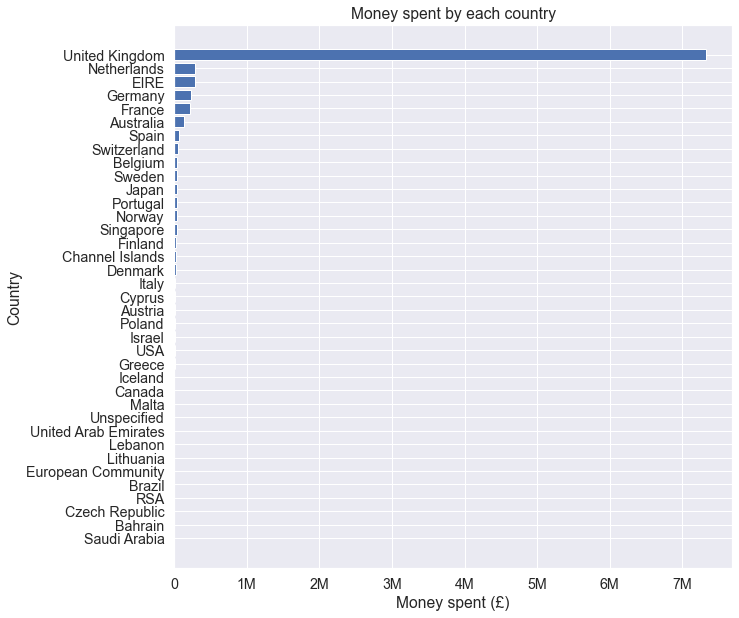

In [46]:
plt.barh(country_spending["Country"],country_spending["Money_spent"])
plt.xlabel("Money spent (£)")
plt.ylabel("Country")
plt.title("Money spent by each country")
plt.xticks(range(0,8000000,1000000),["0","1M","2M","3M","4M","5M","6M","7M"])

Text(0.5, 1.0, 'Money spent by each country')

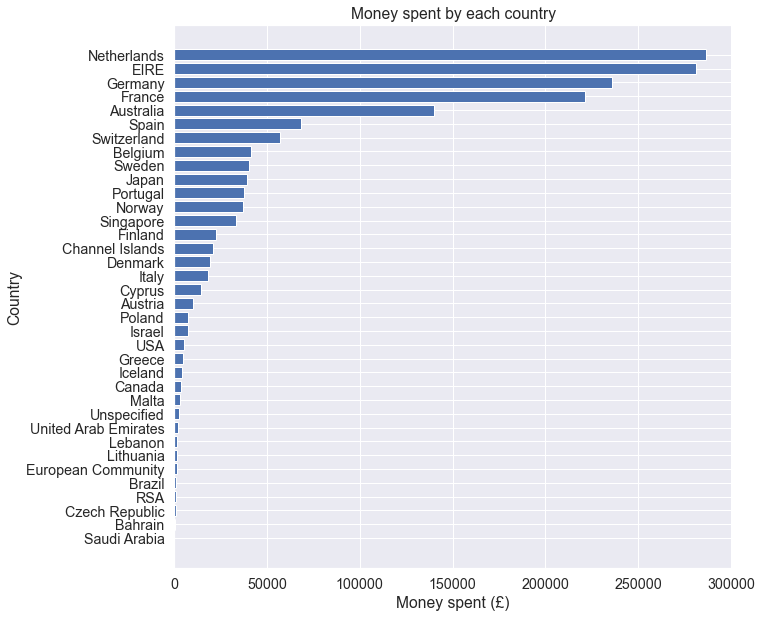

In [47]:
#without (UK) Top countries with highest money spent
country_spent_without_UK=country_spending[country_spending["Country"]!="United Kingdom"]
plt.barh(country_spent_without_UK["Country"],country_spent_without_UK["Money_spent"])
plt.xlabel("Money spent (£)")
plt.ylabel("Country")
plt.title("Money spent by each country")

In [48]:
# Top 5 countries with highest number of customers
cus_no=df.groupby("Country")["CustomerID"].nunique().reset_index()
cus_no=cus_no.sort_values("CustomerID").rename(columns={"CustomerID":"NumberOf_Customers"})
cus_no

,Country,NumberOf_Customers
11,European Community,1
20,Lebanon,1
16,Iceland,1
27,RSA,1
4,Brazil,1
28,Saudi Arabia,1
21,Lithuania,1
29,Singapore,1
8,Czech Republic,1
22,Malta,2


Text(0, 0.5, 'Country')

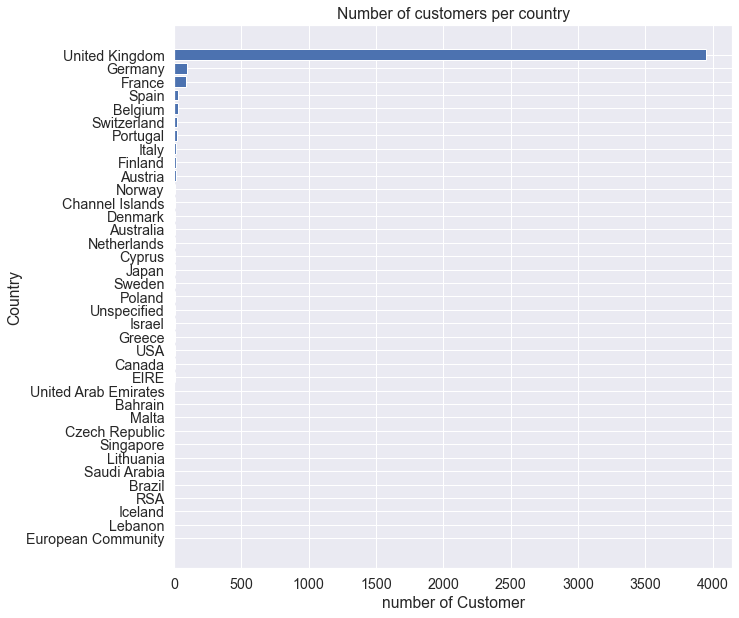

In [49]:
plt.barh(cus_no["Country"],cus_no["NumberOf_Customers"])
plt.title("Number of customers per country")
plt.xlabel("number of Customer")
plt.ylabel("Country")

In [50]:
cus_no.iloc[:-1]

,Country,NumberOf_Customers
11,European Community,1
20,Lebanon,1
16,Iceland,1
27,RSA,1
4,Brazil,1
28,Saudi Arabia,1
21,Lithuania,1
29,Singapore,1
8,Czech Republic,1
22,Malta,2


Text(0, 0.5, 'Country')

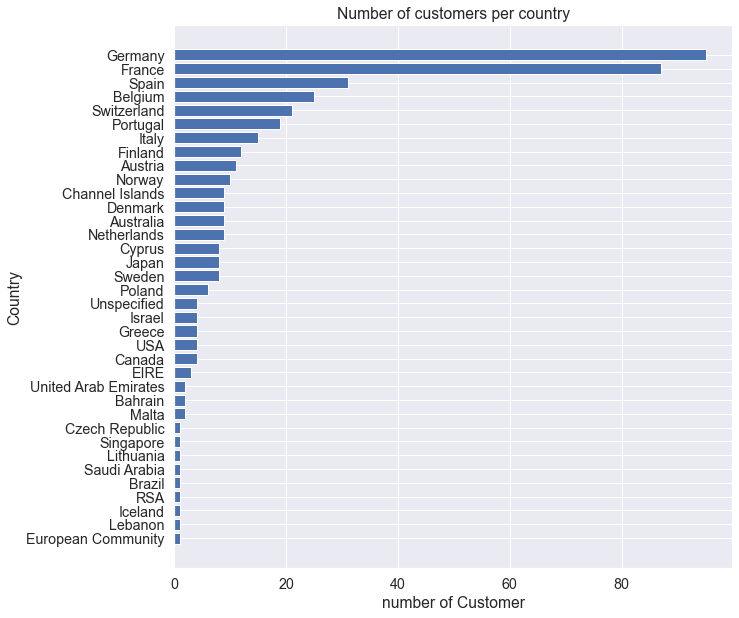

In [51]:
# (without UK) Top countries with highest number of customers
cus_wo_UK=cus_no.iloc[:-1]
plt.barh(cus_wo_UK["Country"],cus_wo_UK["NumberOf_Customers"])
plt.title("Number of customers per country")
plt.xlabel("number of Customer")
plt.ylabel("Country")

In [52]:
# How many orders (per month)?
sort_date=df.sort_values('InvoiceDate')
sort_date["MonthNO"]=sort_date["InvoiceDate"].dt.month
sort_date


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,profit,year,month,MonthNO
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,12
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,12
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,12
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,12
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,plasters in tin strongman,12.0,2011-12-09 12:50:00,1.65,12680.0,France,19.80,2011,12,12
541895,581587,22556,plasters in tin circus parade,12.0,2011-12-09 12:50:00,1.65,12680.0,France,19.80,2011,12,12
541907,581587,23255,childrens cutlery circus parade,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,12
541900,581587,22730,alarm clock bakelike ivory,4.0,2011-12-09 12:50:00,3.75,12680.0,France,15.00,2011,12,12


In [53]:
monthly_order= sort_date.groupby(["MonthNO","month"])["InvoiceNo"].nunique().reset_index()
monthly_order.rename(columns={"InvoiceNo":"NumberOf_Orders"}).drop("MonthNO",axis=1)

,month,NumberOf_Orders
0,1,1234
1,2,1201
2,3,1619
3,4,1384
4,5,1849
5,6,1706
6,7,1593
7,8,1543
8,9,2077
9,10,2263


In [54]:
# Top 10 Demanded Products By Quantity

In [55]:
demanded_pro=df.groupby(["StockCode","Description"])["Quantity"].sum().reset_index()
demanded_pro=demanded_pro.sort_values("Quantity",ascending=False).iloc[:10]
demanded_pro

,StockCode,Description,Quantity
2711,84077,world war 2 gliders asstd designs,55615.0
3585,85099B,jumbo bag red retrospot,47296.0
3592,85123A,white hanging heart t-light holder,39303.0
2817,84879,assorted colour bird ornament,35410.0
361,21212,pack of 72 retrospot cake cases,33977.0
1039,22197,popcorn holder,31358.0
1937,23084,rabbit night light,27310.0
1314,22492,mini paint set vintage,26272.0
1436,22616,pack of 12 london tissues,25369.0
857,21977,pack of 60 pink paisley cake cases,24365.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'world war 2 gliders asstd designs'),
  Text(1, 0, 'jumbo bag red retrospot'),
  Text(2, 0, 'white hanging heart t-light holder'),
  Text(3, 0, 'assorted colour bird ornament'),
  Text(4, 0, 'pack of 72 retrospot cake cases'),
  Text(5, 0, 'popcorn holder'),
  Text(6, 0, 'rabbit night light'),
  Text(7, 0, 'mini paint set vintage '),
  Text(8, 0, 'pack of 12 london tissues '),
  Text(9, 0, 'pack of 60 pink paisley cake cases')])

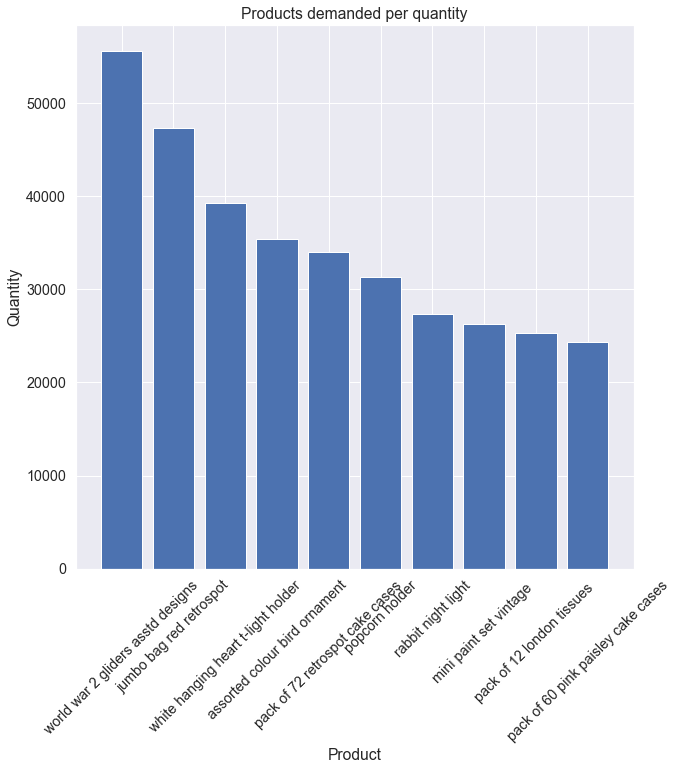

In [56]:
plt.bar(demanded_pro["Description"],demanded_pro["Quantity"])
plt.title("Products demanded per quantity")
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.xticks(rotation=45)

In [57]:
# Top 10 Demanded Products By Sales
hi_val_p=df.groupby(["StockCode","Description"])["profit"].sum().reset_index().sort_values("profit",ascending=False).iloc[:10]
hi_val_p

,StockCode,Description,profit
1249,22423,regency cakestand 3 tier,152315.50
3912,M,manual,126975.32
3592,85123A,white hanging heart t-light holder,107072.45
3914,POST,postage,88897.68
3585,85099B,jumbo bag red retrospot,87204.80
2612,47566,party bunting,70001.13
2817,84879,assorted colour bird ornament,56661.46
1937,23084,rabbit night light,51554.60
2679,79321,chilli lights,46636.21
932,22086,paper chain kit 50's christmas,43821.18


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'regency cakestand 3 tier'),
  Text(1, 0, 'manual'),
  Text(2, 0, 'white hanging heart t-light holder'),
  Text(3, 0, 'postage'),
  Text(4, 0, 'jumbo bag red retrospot'),
  Text(5, 0, 'party bunting'),
  Text(6, 0, 'assorted colour bird ornament'),
  Text(7, 0, 'rabbit night light'),
  Text(8, 0, 'chilli lights'),
  Text(9, 0, "paper chain kit 50's christmas ")])

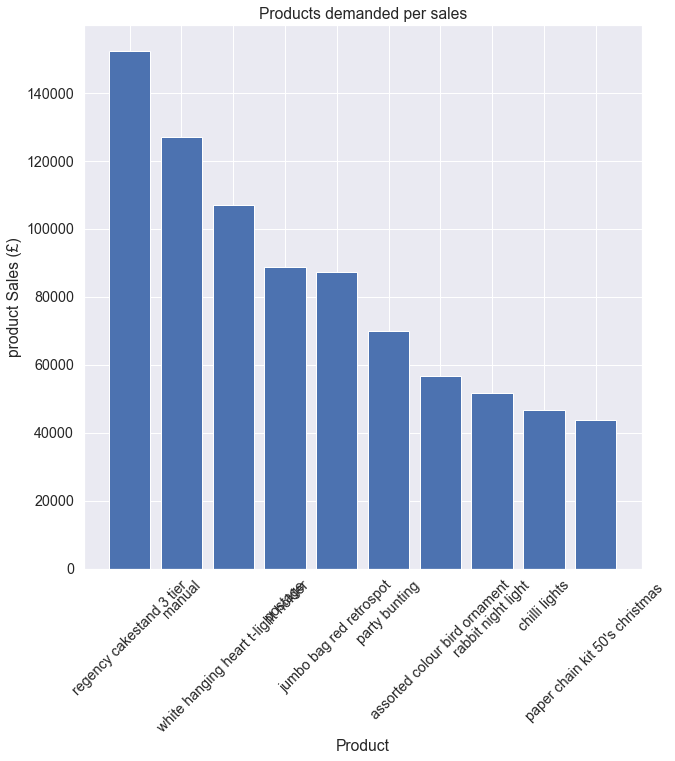

In [58]:
plt.bar(hi_val_p["Description"],hi_val_p["profit"])
plt.title("Products demanded per sales")
plt.xlabel("Product")
plt.ylabel("product Sales (£)")
plt.xticks(rotation=45)

### feature engineering

## lets use RFM Analysis [(Recency, Frequency, Monetary]: 
#### Recency >> If they bought In recent past 
#### Frequency >> If they bought many times
#### Monetary >> If they spent bigger,

In [59]:
df1=df.groupby(df["CustomerID"])["profit"].sum()
df1=df1.reset_index()
df1.columns=["CustomerID","Monetary"]
df1

,CustomerID,Monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,3466.67
...,...,...
4365,18280.0,180.60
4366,18281.0,80.82
4367,18282.0,179.50
4368,18283.0,2094.88


In [60]:
df2 =df.groupby(df["CustomerID"])["InvoiceNo"].count()
df2 =df2 .reset_index()
df2.columns = ['CustomerID', 'frequency']
df2

,CustomerID,frequency
0,12347.0,182
1,12348.0,31
2,12349.0,73
3,12350.0,17
4,12352.0,95
...,...,...
4365,18280.0,10
4366,18281.0,7
4367,18282.0,13
4368,18283.0,756


In [61]:
rmf_df = pd.merge(df1, df2, on='CustomerID', how='inner')
rmf_df

,CustomerID,Monetary,frequency
0,12347.0,4310.00,182
1,12348.0,1797.24,31
2,12349.0,1757.55,73
3,12350.0,334.40,17
4,12352.0,3466.67,95
...,...,...,...
4365,18280.0,180.60,10
4366,18281.0,80.82,7
4367,18282.0,179.50,13
4368,18283.0,2094.88,756


In [62]:
last_date = max(df['InvoiceDate'])
df['diff_in_days'] = last_date - df['InvoiceDate']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,profit,year,month,diff_in_days
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,373 days 04:24:00
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,373 days 04:24:00
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,373 days 04:24:00
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,373 days 04:24:00
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,0 days 00:00:00
541905,581587,22899,children's apron dolly girl,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,0 days 00:00:00
541906,581587,23254,childrens cutlery dolly girl,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,0 days 00:00:00
541907,581587,23255,childrens cutlery circus parade,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,0 days 00:00:00


In [63]:
last_purchase = df.groupby('CustomerID')['diff_in_days'].min()
last_purchase = last_purchase.reset_index()
last_purchase

,CustomerID,diff_in_days
0,12347.0,1 days 20:58:00
1,12348.0,74 days 23:37:00
2,12349.0,18 days 02:59:00
3,12350.0,309 days 20:49:00
4,12352.0,35 days 22:13:00
...,...,...
4365,18280.0,277 days 02:58:00
4366,18281.0,180 days 01:57:00
4367,18282.0,7 days 01:07:00
4368,18283.0,3 days 00:48:00


In [64]:
rmf_df = pd.merge(rmf_df, last_purchase, on='CustomerID', how='inner')
rmf_df.columns = ['CustomerID', 'monetary', 'frequency', 'recency']
rmf_df

,CustomerID,monetary,frequency,recency
0,12347.0,4310.00,182,1 days 20:58:00
1,12348.0,1797.24,31,74 days 23:37:00
2,12349.0,1757.55,73,18 days 02:59:00
3,12350.0,334.40,17,309 days 20:49:00
4,12352.0,3466.67,95,35 days 22:13:00
...,...,...,...,...
4365,18280.0,180.60,10,277 days 02:58:00
4366,18281.0,80.82,7,180 days 01:57:00
4367,18282.0,179.50,13,7 days 01:07:00
4368,18283.0,2094.88,756,3 days 00:48:00


In [65]:
rmf_df['recency'] = rmf_df['recency'].dt.days
rmf_df

,CustomerID,monetary,frequency,recency
0,12347.0,4310.00,182,1
1,12348.0,1797.24,31,74
2,12349.0,1757.55,73,18
3,12350.0,334.40,17,309
4,12352.0,3466.67,95,35
...,...,...,...,...
4365,18280.0,180.60,10,277
4366,18281.0,80.82,7,180
4367,18282.0,179.50,13,7
4368,18283.0,2094.88,756,3


## machine learning model

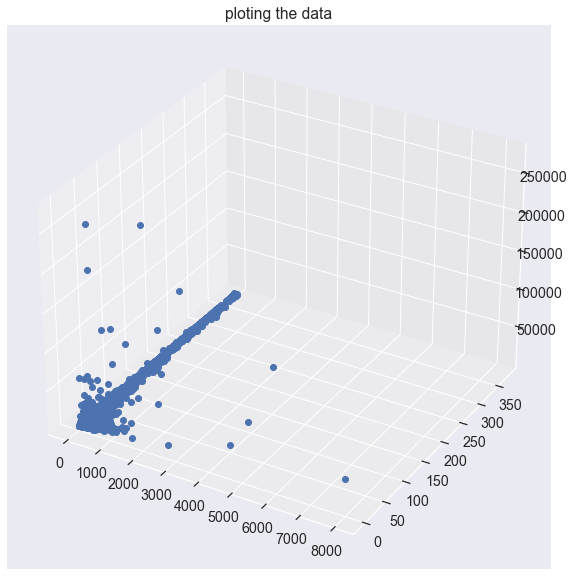

In [66]:
# showing the data
from mpl_toolkits import mplot3d

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z =rmf_df['monetary'] 
x = rmf_df['frequency'] 
y = rmf_df['recency']
 
# plotting
ax.plot3D(x, y, z, 'o')
ax.set_title('ploting the data')
plt.show()

#### feature scaling

In [67]:
scaler=StandardScaler()
df_scaled = rmf_df[['monetary', 'frequency', 'recency']]
df_scaled = scaler.fit_transform(df_scaled)
df_scaled

array([[ 0.2544644 ,  0.38249347, -0.8942059 ],
       [-0.02943608, -0.26708076, -0.16937551],
       [-0.0339204 , -0.08640449, -0.72540978],
       ...,
       [-0.21221404, -0.34451345, -0.8346308 ],
       [ 0.00419234,  2.85173593, -0.87434753],
       [-0.02491222, -0.09930994, -0.48710938]])

In [68]:
scaled_data = pd.DataFrame(df_scaled)
scaled_data.columns = ['monetary', 'frequency', 'recency']
scaled_data.head()

,monetary,frequency,recency
0,0.254464,0.382493,-0.894206
1,-0.029436,-0.267081,-0.169376
2,-0.033920,-0.086404,-0.725410
3,-0.194713,-0.327306,2.163983
4,0.159182,0.008235,-0.556614


 Let's use our first model which is kmeans

All right, let's find the best number of clusters first

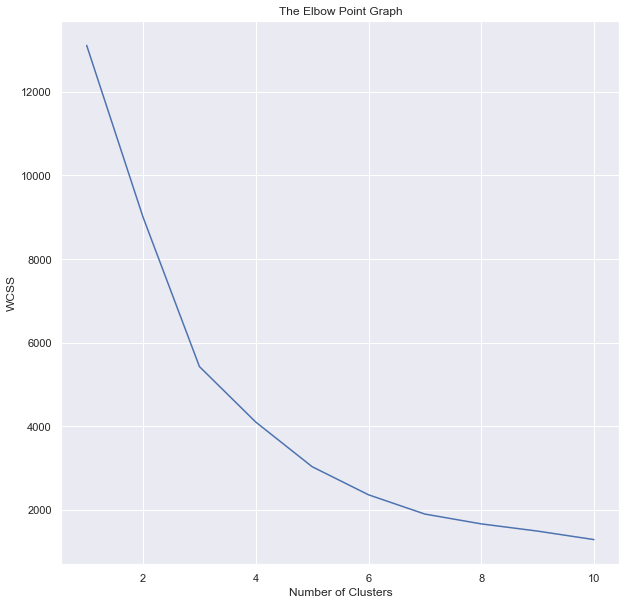

In [69]:
wcss_list = []
for i in range(1,11):
    
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)

  kmeans_model.fit(scaled_data)
    
  wcss_list.append(kmeans_model.inertia_)

sns.set()
plt.plot(range(1,11), wcss_list)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Obviously, the best number is 5 

In [70]:
KMeans_Model = KMeans(n_clusters= 5 ,
                      random_state=4 ,
                      max_iter=300 ,
                      tol=0.0001)
KMeans_Model.fit(scaled_data)

print('KMeansModel centers are : ' , KMeans_Model.cluster_centers_)
print('---------------------------------------------------')
print('KMeansModel labels are : ' , KMeans_Model.labels_[:20])
print('---------------------------------------------------')
print('KMeansModel intertia is : ' , KMeans_Model.inertia_)
print('---------------------------------------------------')

KMeansModel centers are :  [[-0.17645643 -0.28082234  1.56862316]
 [ 1.00954718  1.64481066 -0.77364256]
 [19.10308134  3.53941196 -0.7906587 ]
 [ 8.47559435 25.03727715 -0.8942059 ]
 [-0.08234124 -0.08754993 -0.48064409]]
---------------------------------------------------
KMeansModel labels are :  [4 4 4 0 4 0 0 0 4 4 4 4 4 0 4 4 4 0 4 4]
---------------------------------------------------
KMeansModel intertia is :  3030.4821029220493
---------------------------------------------------


In [72]:
len(set(KMeans_Model.labels_))

5

In [73]:
rmf_df['cluster_ID'] =  KMeans_Model.labels_
rmf_df

,CustomerID,monetary,frequency,recency,cluster_ID
0,12347.0,4310.00,182,1,4
1,12348.0,1797.24,31,74,4
2,12349.0,1757.55,73,18,4
3,12350.0,334.40,17,309,0
4,12352.0,3466.67,95,35,4
...,...,...,...,...,...
4365,18280.0,180.60,10,277,0
4366,18281.0,80.82,7,180,0
4367,18282.0,179.50,13,7,4
4368,18283.0,2094.88,756,3,1


In [74]:
cluster_1 =rmf_df[rmf_df['cluster_ID']==0]
cluster_1

,CustomerID,monetary,frequency,recency,cluster_ID
3,12350.0,334.40,17,309,0
5,12353.0,89.00,4,203,0
6,12354.0,1079.40,58,231,0
7,12355.0,459.40,13,213,0
13,12361.0,189.90,10,286,0
...,...,...,...,...,...
4348,18256.0,50.10,4,354,0
4351,18260.0,2691.40,140,172,0
4357,18269.0,198.30,8,357,0
4365,18280.0,180.60,10,277,0


In [75]:
cluster_2 =rmf_df[rmf_df['cluster_ID']==1]
cluster_2

,CustomerID,monetary,frequency,recency,cluster_ID
65,12428.0,8035.72,300,25,1
70,12433.0,13375.87,420,0,1
85,12451.0,9137.52,355,10,1
99,12471.0,20907.18,531,1,1
100,12472.0,6914.74,391,30,1
...,...,...,...,...,...
4243,18118.0,5711.87,1284,10,1
4247,18122.0,1826.21,364,7,1
4322,18223.0,6653.85,299,1,1
4324,18225.0,5657.22,286,2,1


In [76]:
cluster_3 =rmf_df[rmf_df['cluster_ID']==2]
cluster_3

,CustomerID,monetary,frequency,recency,cluster_ID
54,12415.0,126103.61,776,23,2
1343,14156.0,121375.12,1420,9,2
1701,14646.0,280923.02,2081,1,2
2720,16029.0,111057.07,274,38,2
3756,17450.0,201619.41,351,7,2
3799,17511.0,93999.38,1076,2,2
4231,18102.0,262876.11,433,0,2


In [77]:
cluster_4 =rmf_df[rmf_df['cluster_ID']==3]
cluster_4

,CustomerID,monetary,frequency,recency,cluster_ID
329,12748.0,38367.36,4641,0,3
1298,14096.0,73208.67,5128,3,3
1893,14911.0,155077.50,5901,0,3
4040,17841.0,41642.36,7983,1,3


In [78]:
cluster_5 =rmf_df[rmf_df['cluster_ID']==4]
cluster_5

,CustomerID,monetary,frequency,recency,cluster_ID
0,12347.0,4310.00,182,1,4
1,12348.0,1797.24,31,74,4
2,12349.0,1757.55,73,18,4
4,12352.0,3466.67,95,35,4
8,12356.0,2811.43,59,22,4
...,...,...,...,...,...
4362,18276.0,348.36,16,20,4
4363,18277.0,123.13,9,57,4
4364,18278.0,173.90,9,73,4
4367,18282.0,179.50,13,7,4


ok , lets see the three clusters 

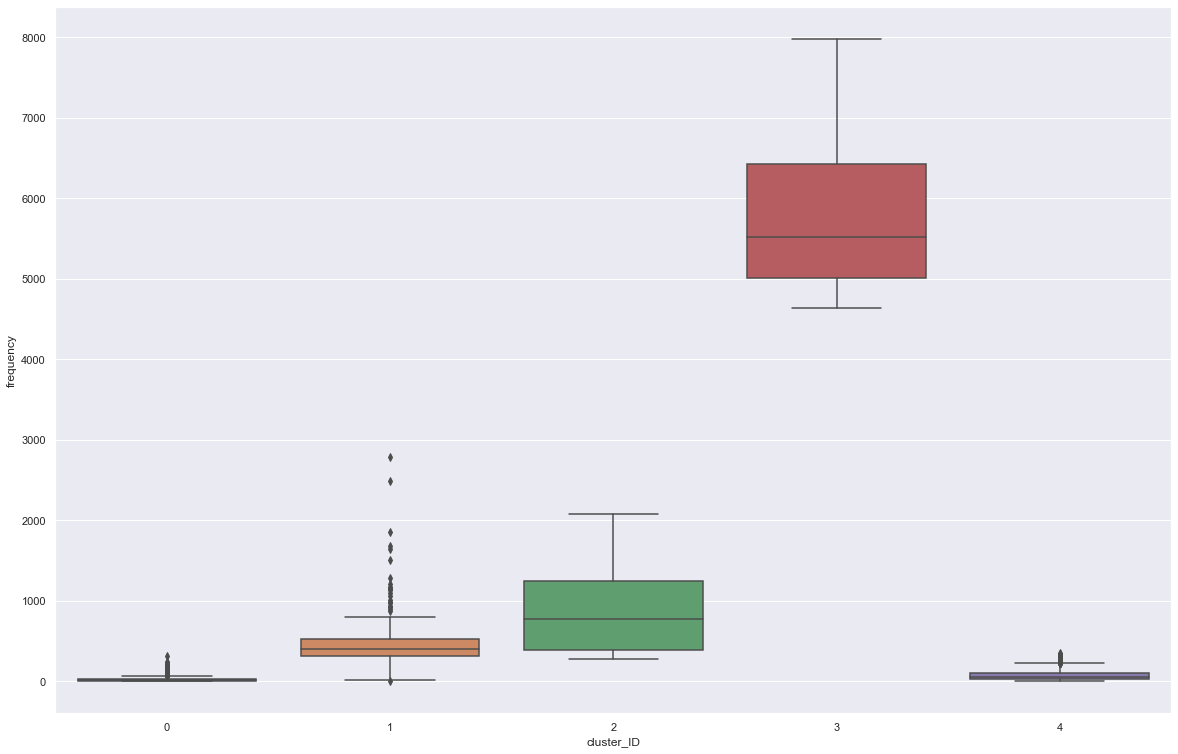

In [79]:
fig=plt.figure(figsize=(20,13))
ax=sns.boxplot(x='cluster_ID', y='frequency', data=rmf_df)
fig.show()

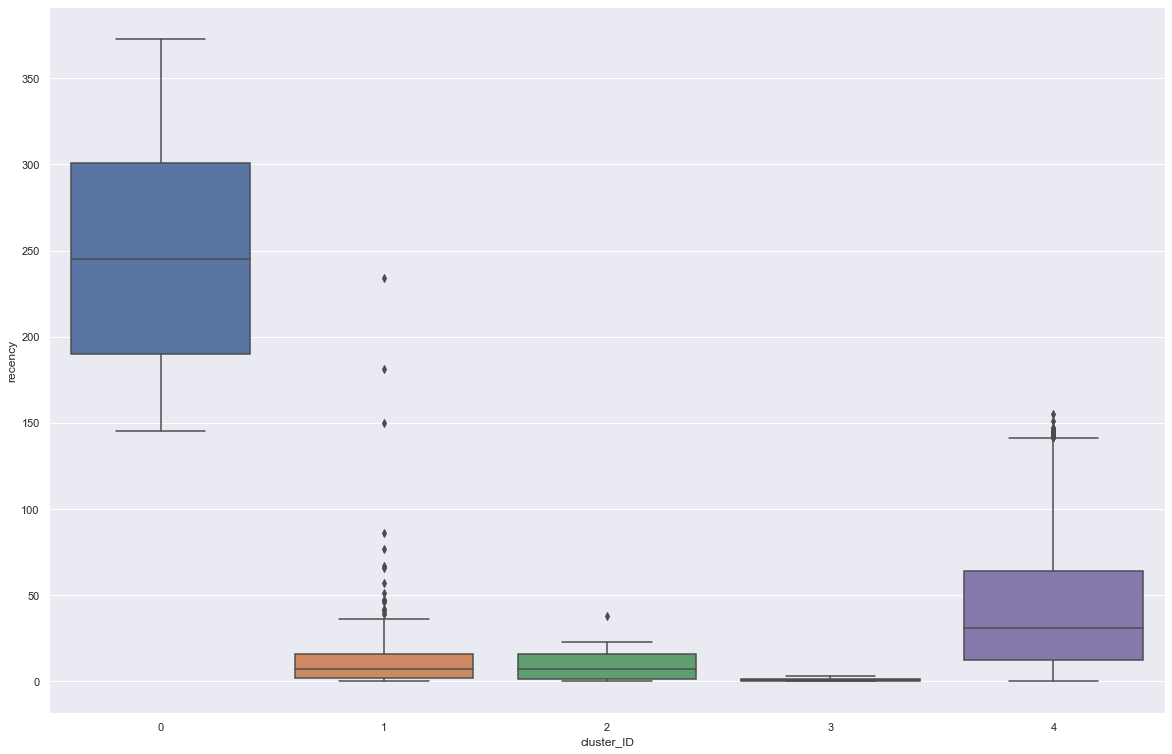

In [80]:
fig=plt.figure(figsize=(20,13))
ax=sns.boxplot(x='cluster_ID', y='recency', data=rmf_df)
fig.show()

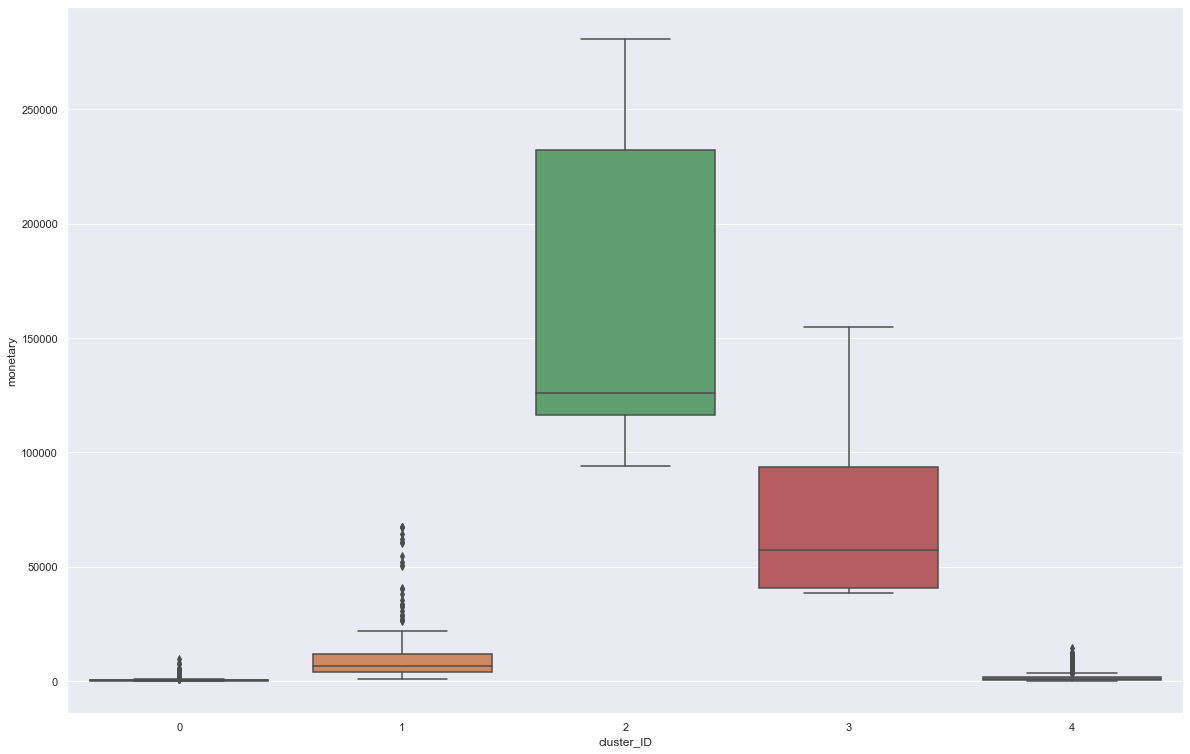

In [81]:
fig=plt.figure(figsize=(20,13))
ax=sns.boxplot(x='cluster_ID', y='monetary', data=rmf_df)
fig.show()

All right , lets test some values

In [82]:
test_data = [200,10,20]
test_data=scaler.transform([test_data])
KMeans_Model.predict(test_data)

array([4])

In [83]:
test_data = [15000,8000,100]
test_data=scaler.transform([test_data])
KMeans_Model.predict(test_data)

array([3])

Let's reduce the dimensions of the data and use Hierarchical clusering

In [84]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=3, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=2, 
                       n_iter=10**4, 
                       random_state=0).fit_transform(scaled_data)

In [85]:
tsne_projection.shape

(4370, 2)

In [86]:
agglomerative = AgglomerativeClustering(n_clusters=5 , affinity='euclidean' , linkage='ward')
agglomerative.fit(tsne_projection)
agglomerative.labels_


array([0, 4, 0, ..., 2, 0, 4], dtype=int64)

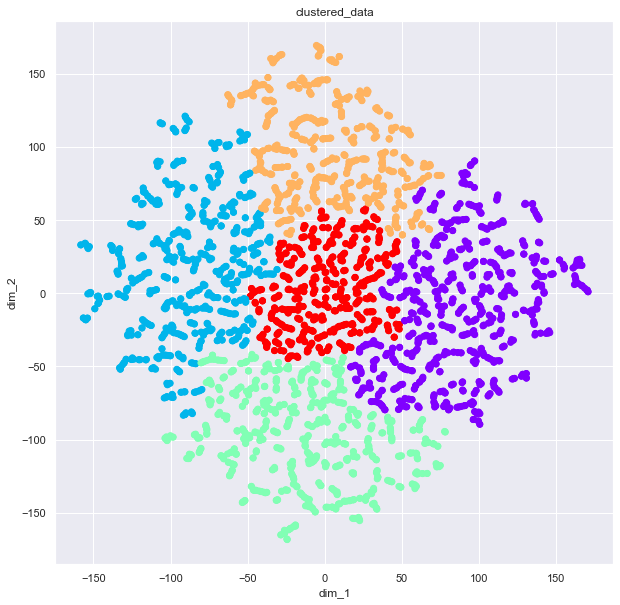

In [87]:
plt.scatter(tsne_projection[:,0],tsne_projection[:,1] , c=agglomerative.labels_ , cmap='rainbow')
plt.title('clustered_data')
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.show()

In [88]:
import joblib

In [89]:
joblib.dump(scaler,'scaler_model')

['scaler_model']

In [90]:
joblib.dump(KMeans_Model,'kmeans_model')

['kmeans_model']